Code for Variance Hammer's Analysis of Curse of the Wulfen
==============================
This code is for the analysis accompanying the post on the Warzone Fenris supplement. The text of the post itself can be found at: http://www.variancehammer.com. Note that because this analysis uses random numbers, any results you obtain may differ from those on the blog posting due to random chance.

**Import the necessary libraries**  

These are easily obtained using the Anaconda Python Distribution, which is available free from http://www.continuum.io

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random as rand
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Graphic and Simulation parameters
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
runs = 10000

As there is no Variance Hammer library available (yet), we need to define a couple useful functions. DiceRoller() is a function to roll an arbitrary number of d6 dice. Shooting() does what it says on the tin - it takes a number of shots, rolls the appropriate number of d6 dice, checks those results against Ballistic Skill, and if the shots are twin-linked, rerolls as appropriate. Note that at the moment this function does not work for BS values above 6.

In [4]:
def DiceRoller(n_rolls):
	try:
		dice = int(n_rolls)
	except ValueError:
		print("Number of dice to roll needs to be an integer")
	rolls = np.random.random_integers(6, size=(1.,dice))
	return rolls

Analysis of Elite CC Unit Mobility

In [5]:
move = np.empty([runs,3])

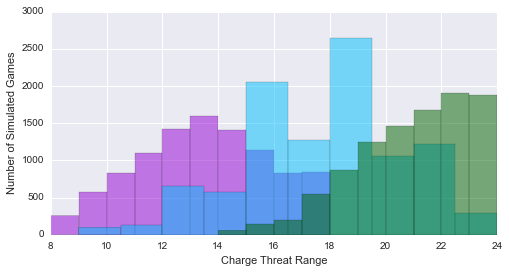

In [6]:
def WGMove():
    # 6" move + charge
    distance = 6 + rand.randint(1,6) + rand.randint(1,6)
    return distance

def WulfenMove():
    # 6" move + run + re-rollable charge
    # Assuming re-rolled charge below 7"
    charge = rand.randint(1,6) + rand.randint(1,6)
    if charge < 8:
        charge = rand.randint(1,6) + rand.randint(1,6)
    distance = 6 + rand.randint(1,6) + charge
    return distance

def TWolfMove():
    # 12" move + charge with fleet
    # Assuming fleet reroll if below 4
    charge1 = rand.randint(1,6)
    charge2 = rand.randint(1,6)
    if charge1 < 4:
        charge1 = rand.randint(1,6)
    if charge2 < 4:
        charge2 = rand.randint(1,6)
    charge = charge1 + charge2
    distance = 12 + charge
    return distance

for d in range(runs):
    move[d][0] = WGMove()
    move[d][1] = WulfenMove()
    move[d][2] = TWolfMove()

plt.hist(move[:,0],bins=10,alpha=0.50,color="DarkViolet")
plt.hist(move[:,1],bins=10,alpha=0.50,color="DeepSkyBlue")
plt.hist(move[:,2],bins=10,alpha=0.50,color="DarkGreen")
plt.xlabel("Charge Threat Range")
plt.ylabel("Number of Simulated Games")
    

In [7]:
def Shooting(BS, n_shots, twinlinked):
    try:
        BS = int(BS)
    except ValueError:
        print("BS needs to be an integer")
    try:
        n_shots = int(n_shots)
    except ValueError:
        print("Number of shots needs to be an integer")
    if twinlinked == "Y":
        shots = DiceRoller(n_shots)
        shots[shots < (7-BS)] = rand.randint(1,6)
    elif twinlinked =="N":
        shots = DiceRoller(n_shots)
    else:
        print("Designate Twin-linking with Y or N. Assumed to be off.")
        shots = DiceRoller(n_shots)

    hits = np.sum(shots.__ge__(7-BS))
    return shots,hits

def Wounding(strength,toughness,save,n_hits,woundspermodel,auto,rend):
    try:
        toughness = int(toughness)
    except ValueError:
        print("Target toughness needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    elif strength == "D-1":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")

    woundrolls = DiceRoller(n_hits)
    if rend ==1:
        auto == 1
    else:
        pass
    
    if auto == 0:
        if strength == "D":
            NoSaveD = np.sum(woundrolls==6)
            SaveD = np.sum(1<woundrolls) - NoSaveD
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            for j in range(NoSaveD):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,(rand.randint(1,6)+6))
            finalwounds = unsaved_expanded
        elif strength == "D-1":
            SaveD = np.sum(2<woundrolls)
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            finalwounds = unsaved_expanded
        
        else:
            SvTDiff = strength-toughness
            ToWound = max(2,4-SvTDiff)
            wounds = np.sum(woundrolls.__ge__(ToWound))
            saverolls = DiceRoller(wounds)
            unsaved = np.sum(saverolls<(save))
            finalwounds = unsaved
            
    else:
        if strength == "D":
            NoSaveD = np.sum(woundrolls==6)
            SaveD = np.sum(1<woundrolls) - NoSaveD
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            for j in range(NoSaveD):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,(rand.randint(1,6)+6))
            finalwounds = unsaved_expanded
        elif strength == "D-1":
            SaveD = np.sum(2<woundrolls)
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            finalwounds = unsaved_expanded
        
        else:
            SvTDiff = strength-toughness
            autowounds = np.sum(woundrolls>=auto)
            if rend == 1:
                rends = np.sum(woundrolls>=6)
            else:
                rends = 0  
            ToWound = max(2,4-SvTDiff)
            wounds = np.sum(woundrolls.__ge__(ToWound))
            if ToWound > 6:
                truewounds = autowounds
            else:
                truewounds = wounds
            saverolls = DiceRoller(truewounds-rends)
            if rend == 0:
                unsaved = np.sum(saverolls<(save))
            else:
                unsaved = np.sum(saverolls<(save)+rends)
            finalwounds = unsaved
        
    return finalwounds

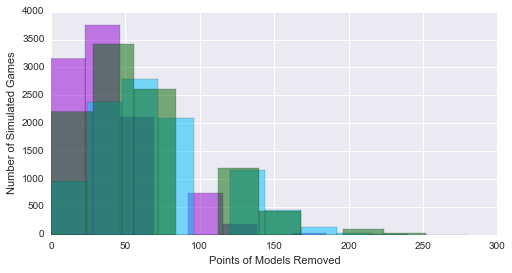

In [8]:
#strength,toughness,save,n_hits,woundspermodel,auto,rend

def BoltersVWG():
    BolterShots = Shooting(4,20,'N')[1]
    BolterWounds = Wounding(4,4,2,BolterShots,1,rend=0,auto=0)
    return float(BolterWounds)

def BoltersVWulfen():
    BolterShots = Shooting(4,20,'N')[1]
    BolterWounds = Wounding(4,4,3,BolterShots,2,rend=0,auto=0)
    return float(BolterWounds)

def BoltersVTW():
    BolterShots = Shooting(4,20,'N')[1]
    BolterWounds = Wounding(4,5,3,BolterShots,2,rend=0,auto=0)
    return float(BolterWounds)

bolters = np.empty([runs,3])

for e in range(runs):
    bolters[e][0] = BoltersVWG()*33
    bolters[e][1] = BoltersVWulfen()*30
    bolters[e][2] = BoltersVTW()*40

plt.hist(bolters[:,0],bins=10,alpha=0.50,color="DarkViolet")
plt.hist(bolters[:,1],bins=10,alpha=0.50,color="DeepSkyBlue")
plt.hist(bolters[:,2],bins=10,alpha=0.50,color="DarkGreen")
plt.xlabel("Points of Models Removed")
plt.ylabel("Number of Simulated Games")  

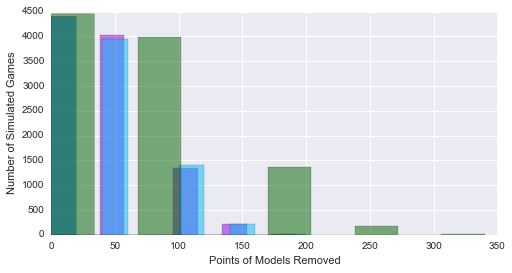

In [9]:
def PulseVWG():
    PulseShots = Shooting(4,4,'N')[1]
    PulseWounds = Wounding(8,4,3,PulseShots,1,rend=0,auto=0)
    return float(PulseWounds)

def PulseVWulfen():
    PulseShots = Shooting(4,4,'N')[1]
    PulseWounds = Wounding(8,4,3,PulseShots,1,rend=0,auto=0)
    return float(PulseWounds)

def PulseVTW():
    PulseShots = Shooting(4,4,'N')[1]
    PulseWounds = Wounding(8,5,3,PulseShots,2,rend=0,auto=0)
    return float(PulseWounds)

pulse = np.empty([runs,3])

for f in range(runs):
    pulse[f][0] = PulseVWG()*48
    pulse[f][1] = PulseVWulfen()*50
    pulse[f][2] = PulseVTW()*85

plt.hist(pulse[:,0],bins=10,alpha=0.50,color="DarkViolet")
plt.hist(pulse[:,1],bins=10,alpha=0.50,color="DeepSkyBlue")
plt.hist(pulse[:,2],bins=10,alpha=0.50,color="DarkGreen")
plt.xlabel("Points of Models Removed")
plt.ylabel("Number of Simulated Games") 

In [10]:
def Melee(toHit, attacks, reroll):
    try:
        toHit = int(toHit)
    except ValueError:
        print("toHit needs to be an integer")
    try:
        attacks = int(attacks)
    except ValueError:
        print("Number of attacks needs to be an integer")
    if reroll == "Y":
        swings = DiceRoller(attacks)
        swings[swings < toHit] = rand.randint(1,6)
    elif reroll =="N":
        swings = DiceRoller(attacks)
    else:
        print("Designate Re-roll with Y or N. Assumed to be off.")
        swings = DiceRoller(attacks)

    hits = np.sum(swings.__ge__(toHit))
    return swings,hits

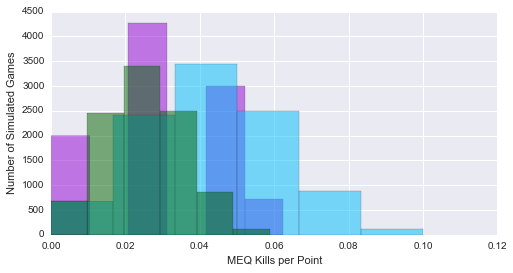

In [11]:
meleeMEQ = np.empty([runs,4])

def WGTCC():
    CChits = Melee(4,3,"N")[1]
    CCWounds = Wounding(8,4,7,CChits,1,rend=0,auto=0)
    return float(CCWounds)

def WulfenCC():
    CChits = Melee(4,5,"N")[1]
    CCWounds = Wounding(10,4,7,CChits,1,rend=0,auto=0)
    return float(CCWounds)

def DeadWulfenCC():
    CChits = Melee(4,10,"N")[1]
    CCWounds = Wounding(10,4,7,CChits,1,rend=0,auto=0)
    return float(CCWounds)

def TWolfCC():
    CChits = Melee(4,5,"N")[1]
    CCWounds = Wounding(10,4,7,CChits,1,rend=0,auto=0)
    return float(CCWounds)

for g in range(runs):
    meleeMEQ[g][0] = WGTCC()/48
    meleeMEQ[g][1] = WulfenCC()/50
    meleeMEQ[g][2] = TWolfCC()/85
    meleeMEQ[g][3] = DeadWulfenCC()/50

plt.hist(meleeMEQ[:,0],bins=6,alpha=0.50,color="DarkViolet")
plt.hist(meleeMEQ[:,1],bins=6,alpha=0.50,color="DeepSkyBlue")
plt.hist(meleeMEQ[:,2],bins=6,alpha=0.50,color="DarkGreen")
plt.xlabel("MEQ Kills per Point")
plt.ylabel("Number of Simulated Games") 

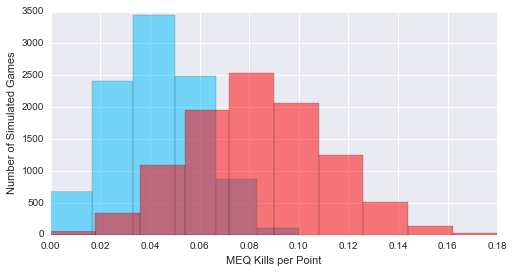

In [12]:
plt.hist(meleeMEQ[:,1],bins=6,alpha=0.50,color="DeepSkyBlue")
plt.hist(meleeMEQ[:,3],bins=10,alpha=0.50,color="Red")
plt.xlabel("MEQ Kills per Point")
plt.ylabel("Number of Simulated Games") 

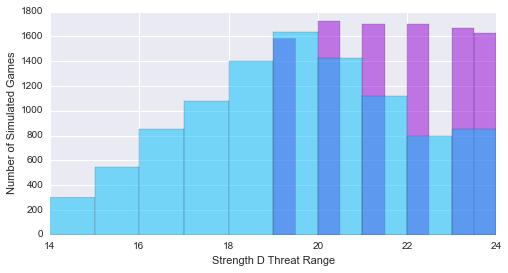

In [13]:
dthreat = np.empty([runs,2])

def WrathMoveShoot():
    # 6" move + d6 Run + 12" range Wrathcannon
    distance = 6 + 12 + rand.randint(1,6)
    return distance

def KnightMoveCharge():
    # 12" move + 2d6 Charge
    distance = 12 + rand.randint(1,6) + rand.randint(1,6)
    return distance

for d in range(runs):
    dthreat[d][0] = WrathMoveShoot()
    dthreat[d][1] = KnightMoveCharge()

plt.hist(dthreat[:,0],bins=10,alpha=0.50,color="DarkViolet")
plt.hist(dthreat[:,1],bins=10,alpha=0.50,color="DeepSkyBlue")
plt.xlabel("Strength D Threat Range")
plt.ylabel("Number of Simulated Games")
    
    


In [14]:
def Shooting(BS, n_shots, twinlinked):
    try:
        BS = int(BS)
    except ValueError:
        print("BS needs to be an integer")
    try:
        n_shots = int(n_shots)
    except ValueError:
        print("Number of shots needs to be an integer")
    if twinlinked == "Y":
        shots = DiceRoller(n_shots)
        shots[shots > BS] = rand.randint(1,6)
    elif twinlinked =="N":
        shots = DiceRoller(n_shots)
    else:
        print("Designate Twin-linking with Y or N. Assumed to be off.")
        shots = DiceRoller(n_shots)

    hits = np.sum(shots.__ge__(7-BS))
    return shots,hits

In [15]:
# SAVE MUST BE MANUALLY SET - NOT AUTO-DETERMINED BY Save vs. AP
def Wounding(strength,toughness,save,n_hits,woundspermodel,auto,rend):
    try:
        toughness = int(toughness)
    except ValueError:
        print("Target toughness needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    elif strength == "D-1":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")

    woundrolls = DiceRoller(n_hits)
    if rend ==1:
        auto == 1
    else:
        pass
    
    if auto == 0:
        if strength == "D":
            NoSaveD = np.sum(woundrolls==6)
            SaveD = np.sum(1<woundrolls) - NoSaveD
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            for j in range(NoSaveD):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,(rand.randint(1,6)+6))
            finalwounds = unsaved_expanded
        elif strength == "D-1":
            SaveD = np.sum(2<woundrolls)
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            finalwounds = unsaved_expanded
        
        else:
            SvTDiff = strength-toughness
            ToWound = max(2,4-SvTDiff)
            wounds = np.sum(woundrolls.__ge__(ToWound))
            saverolls = DiceRoller(wounds)
            unsaved = np.sum(saverolls<(save))
            finalwounds = unsaved
            
    else:
        if strength == "D":
            NoSaveD = np.sum(woundrolls==6)
            SaveD = np.sum(1<woundrolls) - NoSaveD
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            for j in range(NoSaveD):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,(rand.randint(1,6)+6))
            finalwounds = unsaved_expanded
        elif strength == "D-1":
            SaveD = np.sum(2<woundrolls)
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            finalwounds = unsaved_expanded
        
        else:
            SvTDiff = strength-toughness
            autowounds = np.sum(woundrolls>=auto)
            if rend == 1:
                rends = np.sum(woundrolls>=6)
            else:
                rends = 0  
            ToWound = max(2,4-SvTDiff)
            wounds = np.sum(woundrolls.__ge__(ToWound))
            if ToWound > 6:
                truewounds = autowounds
            else:
                truewounds = wounds
            saverolls = DiceRoller(truewounds-rends)
            if rend == 0:
                unsaved = np.sum(saverolls<(save))
            else:
                unsaved = np.sum(saverolls<(save)+rends)
            finalwounds = unsaved
        
    return finalwounds

def ArmorPen(strength,AV,save,n_hits,hullpoints):
    try:
        AV = int(AV)
    except ValueError:
        print("Target Armor Value needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")
    
    if strength == "D":
        penrolls = DiceRoller(n_hits)
        NoSaveD = np.sum(penrolls==6)
        SaveD = np.sum(1<penrolls) - NoSaveD
        saverolls = DiceRoller(SaveD)
        unsaved = np.sum(saverolls<save)
        unsaved_expanded = 0
        for k in range(unsaved):
            unsaved_expanded = unsaved_expanded + min(hullpoints,rand.randint(1,3))
        for j in range(NoSaveD):
            unsaved_expanded = unsaved_expanded + min(hullpoints,(rand.randint(1,6)+6))
        final = min(hullpoints,unsaved_expanded)
    else:
        penrolls = DiceRoller(n_hits) + strength
        pen_and_glance = np.sum(penrolls.__ge__(AV))
        glances = np.sum(penrolls==AV)
        pens = pen_and_glance - glances
        saverolls = DiceRoller(pen_and_glance)
        unsaved = np.sum(saverolls<(save))
        final = min(hullpoints,unsaved)
        
    return final

def ArmorBane(strength,AV,save,n_hits,hullpoints):
    try:
        AV = int(AV)
    except ValueError:
        print("Target Armor Value needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")
    
    if strength == "D":
        penrolls = DiceRoller(n_hits)
        NoSaveD = np.sum(penrolls==6)
        SaveD = np.sum(1<penrolls) - NoSaveD
        saverolls = DiceRoller(SaveD)
        unsaved = np.sum(saverolls<save)
        unsaved_expanded = 0
        for k in range(unsaved):
            unsaved_expanded = unsaved_expanded + min(hullpoints,rand.randint(1,3))
        for j in range(NoSaveD):
            unsaved_expanded = unsaved_expanded + min(hullpoints,(rand.randint(1,6)+6))
        final = min(hullpoints,unsaved_expanded)
    else:
        penrolls = DiceRoller(n_hits) + DiceRoller(n_hits) + strength
        pen_and_glance = np.sum(penrolls.__ge__(AV))
        glances = np.sum(penrolls==AV)
        pens = pen_and_glance - glances
        saverolls = DiceRoller(pen_and_glance)
        unsaved = np.sum(saverolls<(save))
        final = min(hullpoints,unsaved)
        
    return final

In [16]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
runs = 10000

Wound Analysis: Scouts vs. Tactical Marines

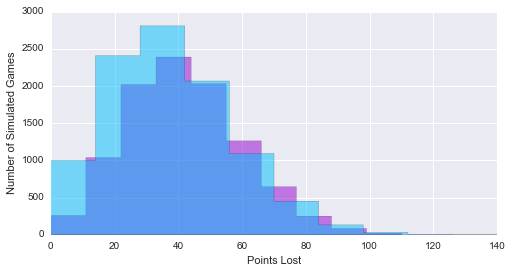

In [17]:
def ScoutsTakingFire():
    Shots = Shooting(4,20,'N')[1]
    Wounds = Wounding(4,4,4,Shots,1,auto=0,rend=0)
    return Wounds

def MarinesTakingFire():
    Shots = Shooting(4,20,'N')[1]
    Wounds = Wounding(4,4,3,Shots,1,auto=0,rend=0)
    return Wounds

no_cover = np.empty([runs,2])
for i in range(runs):
    no_cover[i][0] = ScoutsTakingFire()*11
    no_cover[i][1] = MarinesTakingFire()*14

plt.hist(no_cover[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.hist(no_cover[:,1],alpha=0.50,color="DeepSkyBlue",histtype="stepfilled")
plt.xlabel("Points Lost")
plt.ylabel("Number of Simulated Games")

Wound Analysis: Scouts vs. Sisters of Battle

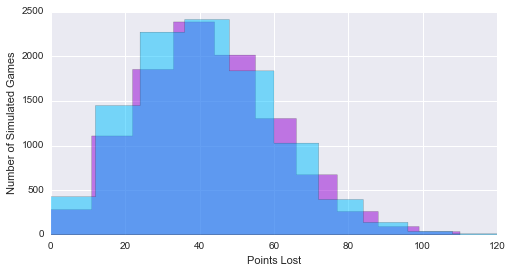

In [18]:
def SistersTakingFire():
    Shots = Shooting(4,20,'N')[1]
    Wounds = Wounding(4,3,3,Shots,1,auto=0,rend=0)
    return Wounds

sisvscout = np.empty([runs,2])
for i in range(runs):
    sisvscout[i][0] = ScoutsTakingFire()*11
    sisvscout[i][1] = SistersTakingFire()*12

plt.hist(sisvscout[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.hist(sisvscout[:,1],alpha=0.50,color="DeepSkyBlue",histtype="stepfilled")
plt.xlabel("Points Lost")
plt.ylabel("Number of Simulated Games")

Just how nasty are Repentia?

In [19]:
def Repentia():
    RepentiaAttacks = Shooting(3,(4*4),'N')[1]
    RepentiaGorP = ArmorBane(6,13,7,RepentiaAttacks,11)
    return RepentiaGorP

In [20]:
RepentiavAv13 = np.empty([runs,1])

for r in range(runs):
    RepentiavAv13[r][0] = Repentia()

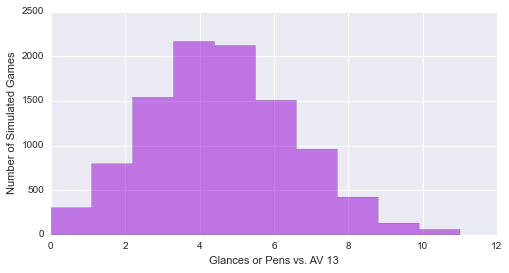

In [21]:
plt.hist(RepentiavAv13[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.xlabel("Glances or Pens vs. AV 13")
plt.ylabel("Number of Simulated Games")